In [1]:
import pandas as pd
import json
import numpy as np
import requests
import os
import re
import seaborn as sns

from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
import keras
from keras.losses import SparseCategoricalCrossentropy
from keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten
from keras.layers import BatchNormalization, Dropout, Activation, RandomFlip, RandomRotation
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import pickle

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
from PIL import Image
from io import BytesIO
import imghdr
import time

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [41]:
path = 'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_data/mushroom_dataset/'

In [42]:
classes = os.listdir(path)
classes

['conditionally_edible', 'deadly', 'edible', 'poisonous']

In [43]:
species_no_data = ['Cortinarius cinnamomeoluteus',
                    'Cortinarius cruentus',
                    'Agaricus xanthodermus',
                    'Cortinarius phoeniceus',
                    'Cortinarius palustris',
                    'Agaricus menieri',
                    'Cortinarius mirandus',
                    'Panaeolus cinctulus',
                    'Entoloma albidum',
                    'Cortinarius rubicundulus',
                    'Agrocybe arenicola',
                    'Ramaria neoformosa',
                    'Agaricus hondensis',
                    'Sarcosphaera coronaria',
                    'Cortinarius smithii',
                    'Amanita arocheae',
                    'Agaricus californicus',
                    'Gyromitra perlata',
                    'Amanita gracilior',
                    'Agaricus silvaticus',
                    'Boletus badius',
                    'Clitocybe nuda',
                    'Cyclocybe aegerita',
                    'Cyttaria espinosae',
                    'Lactarius volemus',
                    'Polyporus squamosus',
                    'Tuber macrosporum',
                    'Hypsizygus tessellatus',
                    'Pseudohydnum gelatinosum',
                    'Echinoderma calcicola',
                    'Coprinopsis alopecia',
                    'Cortinarius splendens',
                    'Hebeloma sinapizans',
                    'Cortinarius cruentus',
                    'Hebeloma sinapizans',
                    'Cortinarius mirandus',
                    'Entoloma albidum',
                    'Agrocybe arenicola',
                    'Agaricus californicus',
                    'Choiromyces venosus',
                    'Hypsizygus tessellatus',
                    'Amanita echinocephala',
                    'Entoloma sinuatum',
                    'Hypholoma marginatum',
                    'Amanita pseudoregalis',
                    'Marasmius collinus',
                    'Rubroboletus legaliae',
                    'Amanita petalinivolva',
                    'Paralepistopsis amoenolens',
                    'Tricholoma pardinum',
                    'Turbinellus floccosus',
                    'Amanita wellsii',
                    'Amanita pseudoporphyria',
                    'Amanita subfrostiana',
                    'Pleurotus oestratus',
                    'Calbovista subsculpta',
                    'Calvatia utriformis',
                    'Turbinellus kauffmanii',
                    'Helvella lactea',
                    'Amanita cothurnata',
                    'Amanita flavoconia',
                    'Amanita pseudorubescens'
                    ]

In [44]:
print(len(species_no_data))
species_no_data = list(set(species_no_data))
print(len(species_no_data))

62
55


In [45]:
non_edible_species_images = []

for c in classes:
    image_folder = os.path.join(path, c)
    if (c == 'deadly' or c == 'poisonous'):
        for species_name in os.listdir(image_folder):
            name = re.sub('[_]', ' ', species_name)
            if name not in species_no_data:
                non_edible_species_images.append({'species_name': species_name, 'image_folder': image_folder, 'num_images': len(os.listdir(os.path.join(image_folder+'/'+species_name)))})

len_images_df = pd.DataFrame(non_edible_species_images)
len_images_df

,species_name,image_folder,num_images
0,Amanita_bisporigera,C:/Users/Simona/Desktop/Data Analysis/concordi...,139
1,Amanita_exitialis,C:/Users/Simona/Desktop/Data Analysis/concordi...,29
2,Amanita_fuliginea,C:/Users/Simona/Desktop/Data Analysis/concordi...,20
3,Amanita_magnivelaris,C:/Users/Simona/Desktop/Data Analysis/concordi...,28
4,Amanita_ocreata,C:/Users/Simona/Desktop/Data Analysis/concordi...,27
...,...,...,...
133,Suillus_granulatus,C:/Users/Simona/Desktop/Data Analysis/concordi...,123
134,Tricholoma_filamentosum,C:/Users/Simona/Desktop/Data Analysis/concordi...,29
135,Tricholoma_muscarium,C:/Users/Simona/Desktop/Data Analysis/concordi...,28
136,Tricholoma_sulphureum,C:/Users/Simona/Desktop/Data Analysis/concordi...,20


In [46]:
sorted_images_df = len_images_df.sort_values(by='num_images', ascending=False).head(52)
sorted_images_df.drop_duplicates(subset='species_name', inplace=True)
print(len(sorted_images_df))
sorted_images_species = dict(zip(list(sorted_images_df['species_name'].values), list(sorted_images_df['image_folder'])))
print(sorted_images_species)

52
{'Cortinarius_limonius': 'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_data/mushroom_dataset/poisonous', 'Agaricus_moelleri': 'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_data/mushroom_dataset/poisonous', 'Cortinarius_malicorius': 'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_data/mushroom_dataset/poisonous', 'Amanita_bisporigera': 'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_data/mushroom_dataset/deadly', 'Cortinarius_cinnamomeus': 'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_data/mushroom_dataset/poisonous', 'Armillaria_mellea': 'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_data/mushroom_dataset/poisonous', 'Galerina_marginata': 'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_data/mushroom_dataset/deadly', 'Cudonia_cir

In [55]:
sorted_images_df

,species_name,image_folder,num_images
84,Cortinarius_limonius,C:/Users/Simona/Desktop/Data Analysis/concordi...,145
34,Agaricus_moelleri,C:/Users/Simona/Desktop/Data Analysis/concordi...,144
85,Cortinarius_malicorius,C:/Users/Simona/Desktop/Data Analysis/concordi...,143
0,Amanita_bisporigera,C:/Users/Simona/Desktop/Data Analysis/concordi...,139
83,Cortinarius_cinnamomeus,C:/Users/Simona/Desktop/Data Analysis/concordi...,139
68,Armillaria_mellea,C:/Users/Simona/Desktop/Data Analysis/concordi...,139
17,Galerina_marginata,C:/Users/Simona/Desktop/Data Analysis/concordi...,135
86,Cudonia_circinans,C:/Users/Simona/Desktop/Data Analysis/concordi...,134
96,Hypholoma_lateritium,C:/Users/Simona/Desktop/Data Analysis/concordi...,134
122,Ramaria_formosa,C:/Users/Simona/Desktop/Data Analysis/concordi...,133


In [47]:
def get_species_names():
    non_edible_species = list()
    edible_species = list()
    edible_len = 0
    non_edible_len = 0
    for c in classes:
        image_folder = os.path.join(path, c)
        if c == 'edible':
            for species_name in os.listdir(image_folder):
                name = re.sub('[_]', ' ', species_name)
                if name not in species_no_data:
                    edible_species.append(name)
                    edible_len += 1
    for species_name, s_path in sorted_images_species.items():
        non_edible_species.append(re.sub('[_]', ' ', species_name))
        non_edible_len += 1
    print(edible_len, non_edible_len)
    return non_edible_species, edible_species


In [48]:
non_edible_species, edible_species = get_species_names()

48 52


In [49]:
edibility_dict = {}
for species in non_edible_species:
    edibility_dict[species] = 'not edible'
for species in edible_species:
    edibility_dict[species] = 'edible'

with open("C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/repository/pickle_jar/edibility_dict.pickle", 'wb') as f:
        pickle.dump(edibility_dict, f)

edibility_dict

{'Cortinarius limonius': 'not edible',
 'Agaricus moelleri': 'not edible',
 'Cortinarius malicorius': 'not edible',
 'Amanita bisporigera': 'not edible',
 'Cortinarius cinnamomeus': 'not edible',
 'Armillaria mellea': 'not edible',
 'Galerina marginata': 'not edible',
 'Cudonia circinans': 'not edible',
 'Hypholoma lateritium': 'not edible',
 'Ramaria formosa': 'not edible',
 'Omphalotus illudens': 'not edible',
 'Helvella crispa': 'not edible',
 'Lepiota cristata': 'not edible',
 'Inocybe geophylla': 'not edible',
 'Cortinarius bolaris': 'not edible',
 'Entoloma rhodopolium': 'not edible',
 'Lactarius chrysorrheus': 'not edible',
 'Ramaria pallida': 'not edible',
 'Paxillus involutus': 'not edible',
 'Psilocybe semilanceata': 'not edible',
 'Hypholoma fasciculare': 'not edible',
 'Clitocybe nebularis': 'not edible',
 'Coprinopsis atramentaria': 'not edible',
 'Coprinopsis romagnesiana': 'not edible',
 'Stropharia aeruginosa': 'not edible',
 'Lepiota subincarnata': 'not edible',
 'Clit

In [50]:
all_species = edible_species
all_species.extend(non_edible_species)

In [51]:
print(len(all_species))
for species in all_species:
    print(species)

100
Agaricus arvensis
Agaricus bisporus
Aleuria aurantia
Amanita caesarea
Auricularia auricula-judae
Boletus edulis
Calocybe gambosa
Calvatia gigantea
Cantharellus cibarius
Coprinus comatus
Cortinarius caperatus
Cortinarius variicolor
Craterellus cornucopioides
Craterellus tubaeformis
Fistulina hepatica
Flammulina velutipes
Grifola frondosa
Hericium erinaceus
Hydnum repandum
Hygrophorus chrysodon
Lactarius deliciosus
Lactarius deterrimus
Lactarius salmonicolor
Lactarius subdulcis
Laetiporus sulphureus
Leccinum aurantiacum
Leccinum scabrum
Leccinum versipelle
Lentinula edodes
Macrolepiota procera
Marasmius oreades
Phallus indusiatus
Pleurotus citrinopileatus
Rhizopogon luteolus
Sparassis crispa
Stropharia rugosoannulata
Suillus bovinus
Suillus luteus
Suillus tomentosus
Tremella fuciformis
Tricholoma matsutake
Tricholoma terreum
Tuber aestivum
Tuber borchii
Tuber brumale
Tuber indicum
Tuber mesentericum
Volvariella volvacea
Cortinarius limonius
Agaricus moelleri
Cortinarius malicorius
Am

In [52]:
species_checklist = []
with open("C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/species_list.txt", 'r') as file:
    for line in file.readlines():
        text = re.sub('[^A-Za-z -]','', line)
        if text != '':
            species_checklist.append(text)

In [53]:
for species in all_species:
    if species not in species_checklist:
        print(species)

In [54]:
def get_species_data():
    species_data = []
    no_data_species = []
    for species_name in all_species:
        try:
            species_dict = {}
            species_dict['species_name'] = species_name

            base_url = 'https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi'

            chromedriver_path = "C:/Users/Simona/Downloads/chromedriver_win32/chromedriver.exe"

            chrome_options = Options()
            chrome_options.add_argument("--disable-infobars")
            driver = webdriver.Chrome(chromedriver_path, options=chrome_options)


            driver.get(base_url)

            html = driver.page_source
            
            input_path = '//*[@id="searchtxt"]'
            field = driver.find_element(by=By.XPATH, value=input_path)
            field.send_keys(f'{species_name}')
            field.submit()

            submit_path = '/html/body/form/table[3]/tbody/tr[1]/td/input[4]'
            submit = driver.find_element(by=By.XPATH, value=submit_path)
            submit.click()

            superkingdom_element = driver.find_element(by=By.XPATH, value='//a[@title="superkingdom"]')
            superkingdom = superkingdom_element.text
            species_dict['superkingdom'] = superkingdom

            clade_element = driver.find_element(by=By.XPATH, value='//a[@title="clade"]')
            clade = clade_element.text
            species_dict['clade'] = clade

            kingdom_element = driver.find_element(by=By.XPATH, value='//a[@title="kingdom"]')
            kingdom = kingdom_element.text
            species_dict['kingdom'] = kingdom

            subkingdom_element = driver.find_element(by=By.XPATH, value='//a[@title="subkingdom"]')
            subkingdom = subkingdom_element.text
            species_dict['subkingdom'] = subkingdom

            phylum_element = driver.find_element(by=By.XPATH, value='//a[@title="phylum"]')
            phylum = phylum_element.text
            species_dict['phylum'] = phylum

            subphylum_element = driver.find_element(by=By.XPATH, value='//a[@title="subphylum"]')
            subphylum = subphylum_element.text
            species_dict['subphylum'] = subphylum

            class_element = driver.find_element(by=By.XPATH, value='//a[@title="class"]')
            class_ = class_element.text
            species_dict['class'] = class_

            order_element = driver.find_element(by=By.XPATH, value='//a[@title="order"]')
            order = order_element.text
            species_dict['order'] = order

            family_element = driver.find_element(by=By.XPATH, value='//a[@title="family"]')
            family = family_element.text
            species_dict['family'] = family

            genus_element = driver.find_element(by=By.XPATH, value='//a[@title="genus"]')
            genus = genus_element.text
            species_dict['genus'] = genus

            species_data.append(species_dict)

            driver.close()

        except:
            no_data_species.append(species_name)
            print(f"{species_name} has no data.")

    return species_data, no_data_species

In [ ]:
species_data, no_data_species = get_species_data()

In [ ]:
species_data = species_data
species_data_df = pd.DataFrame(species_data)
species_data_df.drop_duplicates()

In [ ]:
species_data_df.to_csv('species_data_df', index=False)

In [56]:
species_data_df = pd.read_csv('species_data_df')
species_data_df

,species_name,superkingdom,clade,kingdom,subkingdom,phylum,subphylum,class,order,family,genus
0,Agaricus arvensis,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota,Agaricomycotina,Agaricomycetes,Agaricales,Agaricaceae,Agaricus
1,Agaricus bisporus,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota,Agaricomycotina,Agaricomycetes,Agaricales,Agaricaceae,Agaricus
2,Aleuria aurantia,Eukaryota,Opisthokonta,Fungi,Dikarya,Ascomycota,Pezizomycotina,Pezizomycetes,Pezizales,Pyronemataceae,Aleuria
3,Amanita caesarea,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota,Agaricomycotina,Agaricomycetes,Agaricales,Amanitaceae,Amanita
4,Auricularia auricula-judae,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota,Agaricomycotina,Agaricomycetes,Auriculariales,Auriculariaceae,Auricularia
...,...,...,...,...,...,...,...,...,...,...,...
95,Cortinarius callisteus,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota,Agaricomycotina,Agaricomycetes,Agaricales,Cortinariaceae,Aureonarius
96,Inocybe fibrosa,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota,Agaricomycotina,Agaricomycetes,Agaricales,Inocybaceae,Inocybe
97,Amanita farinosa,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota,Agaricomycotina,Agaricomycetes,Agaricales,Amanitaceae,Amanita
98,Hapalopilus nidulans,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota,Agaricomycotina,Agaricomycetes,Polyporales,Phanerochaetaceae,Hapalopilus


In [57]:
len(species_data_df['species_name'].unique())

100

In [58]:
print(f"{len(species_data_df['class'].unique())} class")
print(f"{len(species_data_df['order'].unique())} order")
print(f"{len(species_data_df['family'].unique())} family")
print(f"{len(species_data_df['genus'].unique())} genus")

5 class
12 order
40 family
57 genus


In [59]:
species_data_df.drop_duplicates().groupby('order').count()['species_name']

order
Agaricales        56
Auriculariales     1
Boletales         10
Cantharellales     4
Dacrymycetales     1
Gomphales          2
Pezizales          9
Phallales          1
Polyporales        4
Rhytismatales      1
Russulales        10
Tremellales        1
Name: species_name, dtype: int64

In [60]:
le = LabelEncoder()
le.fit(species_data_df['order'])
order_labels = le.transform(species_data_df['order'])
species_data_df['order_label'] = order_labels
species_data_df.drop_duplicates(inplace=True)
species_data_df

,species_name,superkingdom,clade,kingdom,subkingdom,phylum,subphylum,class,order,family,genus,order_label
0,Agaricus arvensis,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota,Agaricomycotina,Agaricomycetes,Agaricales,Agaricaceae,Agaricus,0
1,Agaricus bisporus,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota,Agaricomycotina,Agaricomycetes,Agaricales,Agaricaceae,Agaricus,0
2,Aleuria aurantia,Eukaryota,Opisthokonta,Fungi,Dikarya,Ascomycota,Pezizomycotina,Pezizomycetes,Pezizales,Pyronemataceae,Aleuria,6
3,Amanita caesarea,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota,Agaricomycotina,Agaricomycetes,Agaricales,Amanitaceae,Amanita,0
4,Auricularia auricula-judae,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota,Agaricomycotina,Agaricomycetes,Auriculariales,Auriculariaceae,Auricularia,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Cortinarius callisteus,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota,Agaricomycotina,Agaricomycetes,Agaricales,Cortinariaceae,Aureonarius,0
96,Inocybe fibrosa,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota,Agaricomycotina,Agaricomycetes,Agaricales,Inocybaceae,Inocybe,0
97,Amanita farinosa,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota,Agaricomycotina,Agaricomycetes,Agaricales,Amanitaceae,Amanita,0
98,Hapalopilus nidulans,Eukaryota,Opisthokonta,Fungi,Dikarya,Basidiomycota,Agaricomycotina,Agaricomycetes,Polyporales,Phanerochaetaceae,Hapalopilus,8


In [61]:
for i in range(len(species_data_df.groupby('order').count()['species_name'])):
    if species_data_df.groupby('order').count()['species_name'].iloc[i]>1:
        print(i)
species_data_df.groupby('order').count()['species_name']

0
2
3
5
6
8
10


order
Agaricales        56
Auriculariales     1
Boletales         10
Cantharellales     4
Dacrymycetales     1
Gomphales          2
Pezizales          9
Phallales          1
Polyporales        4
Rhytismatales      1
Russulales        10
Tremellales        1
Name: species_name, dtype: int64

In [62]:
order_series = species_data_df.groupby('order').count()['species_name'].index
order_series
order_dict = dict(zip([i for i in range(len(order_series))], order_series))
order_dict

{0: 'Agaricales',
 1: 'Auriculariales',
 2: 'Boletales',
 3: 'Cantharellales',
 4: 'Dacrymycetales',
 5: 'Gomphales',
 6: 'Pezizales',
 7: 'Phallales',
 8: 'Polyporales',
 9: 'Rhytismatales',
 10: 'Russulales',
 11: 'Tremellales'}

In [63]:
for i in range(len(order_dict)):
    if i in [0,2,3,5,6,8,10]:
        pass
    else:
        order_dict[i] = species_data_df[species_data_df['order_label'] == i]['species_name'].values[0]

order_dict

{0: 'Agaricales',
 1: 'Auricularia auricula-judae',
 2: 'Boletales',
 3: 'Cantharellales',
 4: 'Calocera viscosa',
 5: 'Gomphales',
 6: 'Pezizales',
 7: 'Phallus indusiatus',
 8: 'Polyporales',
 9: 'Cudonia circinans',
 10: 'Russulales',
 11: 'Tremella fuciformis'}

In [64]:
with open("C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/repository/pickle_jar/order_dict.pickle", 'wb') as f:
        pickle.dump(order_dict, f)

In [66]:
species_order = {}
for i in range(len(species_data_df)):
    species_order[species_data_df.iloc[i]['species_name']] = species_data_df.iloc[i]['order_label']

print(len(species_order))
species_order

100


{'Agaricus arvensis': 0,
 'Agaricus bisporus': 0,
 'Aleuria aurantia': 6,
 'Amanita caesarea': 0,
 'Auricularia auricula-judae': 1,
 'Boletus edulis': 2,
 'Calocybe gambosa': 0,
 'Calvatia gigantea': 0,
 'Cantharellus cibarius': 3,
 'Coprinus comatus': 0,
 'Cortinarius caperatus': 0,
 'Cortinarius variicolor': 0,
 'Craterellus cornucopioides': 3,
 'Craterellus tubaeformis': 3,
 'Fistulina hepatica': 0,
 'Flammulina velutipes': 0,
 'Grifola frondosa': 8,
 'Hericium erinaceus': 10,
 'Hydnum repandum': 3,
 'Hygrophorus chrysodon': 0,
 'Lactarius deliciosus': 10,
 'Lactarius deterrimus': 10,
 'Lactarius salmonicolor': 10,
 'Lactarius subdulcis': 10,
 'Laetiporus sulphureus': 8,
 'Leccinum aurantiacum': 2,
 'Leccinum scabrum': 2,
 'Leccinum versipelle': 2,
 'Lentinula edodes': 0,
 'Macrolepiota procera': 0,
 'Marasmius oreades': 0,
 'Phallus indusiatus': 7,
 'Pleurotus citrinopileatus': 0,
 'Rhizopogon luteolus': 2,
 'Sparassis crispa': 8,
 'Stropharia rugosoannulata': 0,
 'Suillus bovinus'

In [67]:
species_order_list = list(species_order.keys())
species_order_list

['Agaricus arvensis',
 'Agaricus bisporus',
 'Aleuria aurantia',
 'Amanita caesarea',
 'Auricularia auricula-judae',
 'Boletus edulis',
 'Calocybe gambosa',
 'Calvatia gigantea',
 'Cantharellus cibarius',
 'Coprinus comatus',
 'Cortinarius caperatus',
 'Cortinarius variicolor',
 'Craterellus cornucopioides',
 'Craterellus tubaeformis',
 'Fistulina hepatica',
 'Flammulina velutipes',
 'Grifola frondosa',
 'Hericium erinaceus',
 'Hydnum repandum',
 'Hygrophorus chrysodon',
 'Lactarius deliciosus',
 'Lactarius deterrimus',
 'Lactarius salmonicolor',
 'Lactarius subdulcis',
 'Laetiporus sulphureus',
 'Leccinum aurantiacum',
 'Leccinum scabrum',
 'Leccinum versipelle',
 'Lentinula edodes',
 'Macrolepiota procera',
 'Marasmius oreades',
 'Phallus indusiatus',
 'Pleurotus citrinopileatus',
 'Rhizopogon luteolus',
 'Sparassis crispa',
 'Stropharia rugosoannulata',
 'Suillus bovinus',
 'Suillus luteus',
 'Suillus tomentosus',
 'Tremella fuciformis',
 'Tricholoma matsutake',
 'Tricholoma terreum

In [68]:
def create_image_data():
    num = 0
    non_edible_species = list()
    edible_species = list()
    species_index_dict = {}

    train_images = list()
    test_images = list()
    valid_images = list()

    order_0_train_images = list()
    order_0_test_images = list()
    order_0_valid_images = list()

    order_2_train_images = list()
    order_2_test_images = list()
    order_2_valid_images = list()

    order_3_train_images = list()
    order_3_test_images = list()
    order_3_valid_images = list()

    order_5_train_images = list()
    order_5_test_images = list()
    order_5_valid_images = list()

    order_6_train_images = list()
    order_6_test_images = list()
    order_6_valid_images = list()

    order_8_train_images = list()
    order_8_test_images = list()
    order_8_valid_images = list()

    order_10_train_images = list()
    order_10_test_images = list()
    order_10_valid_images = list()

    species_index = 0
    edible_len = 0
    non_edible_len = 0


    for c in classes:
        image_folder = os.path.join(path, c)
        if c == 'edible':
            for species_name in os.listdir(image_folder):
                try:
                    name = re.sub('[_]', ' ', species_name)
                    species_order[name]
                    
                    if name in species_order_list and name not in species_no_data:
                        edible_species.append(name)
                        species_images = list()
                        for image_name in os.listdir(os.path.join(image_folder+'/'+species_name)):
                            image_path = os.path.join(image_folder+'/'+species_name+'/'+image_name)
                            img = imread(image_path, as_gray=False)
                            img = img / 255
                            image_class = species_order[name]
                            species_images.append([img, image_class, species_index])
                        species_index_dict[name] = species_index
                        num += 1

                        train_species, test_species = train_test_split(species_images, test_size=0.2, random_state=42)
                        test_species, valid_species = train_test_split(test_species, test_size=0.5, random_state=42)

                        [train_images.append(species[0:2]) for species in train_species]
                        [test_images.append(species[0:2]) for species in test_species]
                        [valid_images.append(species[0:2]) for species in valid_species]

                        [order_0_train_images.append([species[0], species[2]]) for species in train_species if species[1] == 0]
                        [order_0_test_images.append([species[0], species[2]]) for species in test_species if species[1] == 0]
                        [order_0_valid_images.append([species[0], species[2]]) for species in valid_species if species[1] == 0]

                        [order_2_train_images.append([species[0], species[2]]) for species in train_species if species[1] == 2]
                        [order_2_test_images.append([species[0], species[2]]) for species in test_species if species[1] == 2]
                        [order_2_valid_images.append([species[0], species[2]]) for species in valid_species if species[1] == 2]

                        [order_3_train_images.append([species[0], species[2]]) for species in train_species if species[1] == 3]
                        [order_3_test_images.append([species[0], species[2]]) for species in test_species if species[1] == 3]
                        [order_3_valid_images.append([species[0], species[2]]) for species in valid_species if species[1] == 3]

                        [order_5_train_images.append([species[0], species[2]]) for species in train_species if species[1] == 5]
                        [order_5_test_images.append([species[0], species[2]]) for species in test_species if species[1] == 5]
                        [order_5_valid_images.append([species[0], species[2]]) for species in valid_species if species[1] == 5]

                        [order_6_train_images.append([species[0], species[2]]) for species in train_species if species[1] == 6]
                        [order_6_test_images.append([species[0], species[2]]) for species in test_species if species[1] == 6]
                        [order_6_valid_images.append([species[0], species[2]]) for species in valid_species if species[1] == 6]

                        [order_8_train_images.append([species[0], species[2]]) for species in train_species if species[1] == 8]
                        [order_8_test_images.append([species[0], species[2]]) for species in test_species if species[1] == 8]
                        [order_8_valid_images.append([species[0], species[2]]) for species in valid_species if species[1] == 8]

                        [order_10_train_images.append([species[0], species[2]]) for species in train_species if species[1] == 10]
                        [order_10_test_images.append([species[0], species[2]]) for species in test_species if species[1] == 10]
                        [order_10_valid_images.append([species[0], species[2]]) for species in valid_species if species[1] == 10]
                        
                        species_index += 1
                        edible_len += 1
                except KeyError:
                    pass
                except:
                    print(name)

    for species_name in sorted_images_species:
        try:
            name = re.sub('[_]', ' ', species_name)
            species_order[name]
            
            if name in species_order_list and name not in species_no_data and non_edible_len < 52:
                non_edible_species.append(name)
                species_images = list()
                for image_name in os.listdir(os.path.join(sorted_images_species[species_name]+'/'+species_name)):
                    image_path = os.path.join(sorted_images_species[species_name]+'/'+species_name+'/'+image_name)
                    img = imread(image_path, as_gray=False)
                    img = img / 255
                    image_class = species_order[name]
                    species_images.append([img, image_class, species_index])
                species_index_dict[name] = species_index
                num += 1

                train_species, test_species = train_test_split(species_images, test_size=0.2, random_state=42)
                test_species, valid_species = train_test_split(test_species, test_size=0.5, random_state=42)

                [train_images.append(species[0:2]) for species in train_species]
                [test_images.append(species[0:2]) for species in test_species]
                [valid_images.append(species[0:2]) for species in valid_species]

                [order_0_train_images.append([species[0], species[2]]) for species in train_species if species[1] == 0]
                [order_0_test_images.append([species[0], species[2]]) for species in test_species if species[1] == 0]
                [order_0_valid_images.append([species[0], species[2]]) for species in valid_species if species[1] == 0]

                [order_2_train_images.append([species[0], species[2]]) for species in train_species if species[1] == 2]
                [order_2_test_images.append([species[0], species[2]]) for species in test_species if species[1] == 2]
                [order_2_valid_images.append([species[0], species[2]]) for species in valid_species if species[1] == 2]

                [order_3_train_images.append([species[0], species[2]]) for species in train_species if species[1] == 3]
                [order_3_test_images.append([species[0], species[2]]) for species in test_species if species[1] == 3]
                [order_3_valid_images.append([species[0], species[2]]) for species in valid_species if species[1] == 3]

                [order_5_train_images.append([species[0], species[2]]) for species in train_species if species[1] == 5]
                [order_5_test_images.append([species[0], species[2]]) for species in test_species if species[1] == 5]
                [order_5_valid_images.append([species[0], species[2]]) for species in valid_species if species[1] == 5]

                [order_6_train_images.append([species[0], species[2]]) for species in train_species if species[1] == 6]
                [order_6_test_images.append([species[0], species[2]]) for species in test_species if species[1] == 6]
                [order_6_valid_images.append([species[0], species[2]]) for species in valid_species if species[1] == 6]

                [order_8_train_images.append([species[0], species[2]]) for species in train_species if species[1] == 8]
                [order_8_test_images.append([species[0], species[2]]) for species in test_species if species[1] == 8]
                [order_8_valid_images.append([species[0], species[2]]) for species in valid_species if species[1] == 8]

                [order_10_train_images.append([species[0], species[2]]) for species in train_species if species[1] == 10]
                [order_10_test_images.append([species[0], species[2]]) for species in test_species if species[1] == 10]
                [order_10_valid_images.append([species[0], species[2]]) for species in valid_species if species[1] == 10]

                species_index += 1
                non_edible_len += 1
        except KeyError:
            pass
    print(edible_len, non_edible_len)
    print(num)
    return non_edible_species, edible_species, species_index_dict, train_images, test_images, valid_images, order_0_train_images, order_0_test_images, order_0_valid_images, order_2_train_images, order_2_test_images, order_2_valid_images, order_3_train_images, order_3_test_images, order_3_valid_images, order_5_train_images, order_5_test_images, order_5_valid_images, order_6_train_images, order_6_test_images, order_6_valid_images, order_8_train_images, order_8_test_images, order_8_valid_images, order_10_train_images, order_10_test_images, order_10_valid_images

In [69]:
non_edible_species, edible_species, species_index_dict, train_images, test_images, valid_images, order_0_train_images, order_0_test_images, order_0_valid_images, order_2_train_images, order_2_test_images, order_2_valid_images, order_3_train_images, order_3_test_images, order_3_valid_images, order_5_train_images, order_5_test_images, order_5_valid_images, order_6_train_images, order_6_test_images, order_6_valid_images, order_8_train_images, order_8_test_images, order_8_valid_images, order_10_train_images, order_10_test_images, order_10_valid_images = create_image_data()

In [ ]:
for species in non_edible_species:
    print(species)

Cortinarius limonius
Agaricus moelleri
Cortinarius malicorius
Amanita bisporigera
Cortinarius cinnamomeus
Armillaria mellea
Galerina marginata
Cudonia circinans
Hypholoma lateritium
Ramaria formosa
Omphalotus illudens
Helvella crispa
Lepiota cristata
Inocybe geophylla
Cortinarius bolaris
Entoloma rhodopolium
Lactarius chrysorrheus
Ramaria pallida
Paxillus involutus
Psilocybe semilanceata
Hypholoma fasciculare
Clitocybe nebularis
Coprinopsis atramentaria
Coprinopsis romagnesiana
Stropharia aeruginosa
Lepiota subincarnata
Clitocybe rivulosa
Inocybe rimosa
Omphalotus olearius
Cortinarius cinnabarinus
Coprinellus micaceus
Helvella lacunosa
Chlorophyllum molybdites
Calocera viscosa
Lactarius torminosus
Inocybe lacera
Suillus granulatus
Russula viscida
Clitocybe dealbata
Echinoderma asperum
Agaricus phaeolepidotus
Russula emetica
Tricholoma equestre
Chlorophyllum brunneum
Cortinarius rubellus
Lactarius helvus
Conocybe subovalis
Cortinarius callisteus
Inocybe fibrosa
Amanita farinosa
Hapalopi

In [ ]:
for species in edible_species:
    print(species)

Agaricus arvensis
Agaricus bisporus
Aleuria aurantia
Amanita caesarea
Auricularia auricula-judae
Boletus edulis
Calocybe gambosa
Calvatia gigantea
Cantharellus cibarius
Coprinus comatus
Cortinarius caperatus
Cortinarius variicolor
Craterellus cornucopioides
Craterellus tubaeformis
Fistulina hepatica
Flammulina velutipes
Grifola frondosa
Hericium erinaceus
Hydnum repandum
Hygrophorus chrysodon
Lactarius deliciosus
Lactarius deterrimus
Lactarius salmonicolor
Lactarius subdulcis
Laetiporus sulphureus
Leccinum aurantiacum
Leccinum scabrum
Leccinum versipelle
Lentinula edodes
Macrolepiota procera
Marasmius oreades
Phallus indusiatus
Pleurotus citrinopileatus
Rhizopogon luteolus
Sparassis crispa
Stropharia rugosoannulata
Suillus bovinus
Suillus luteus
Suillus tomentosus
Tremella fuciformis
Tricholoma matsutake
Tricholoma terreum
Tuber aestivum
Tuber borchii
Tuber brumale
Tuber indicum
Tuber mesentericum
Volvariella volvacea


In [ ]:
species_dict_inverse = dict(zip(species_index_dict.values(), species_index_dict.keys()))
species_dict_inverse

{0: 'Agaricus arvensis',
 1: 'Agaricus bisporus',
 2: 'Aleuria aurantia',
 3: 'Amanita caesarea',
 4: 'Auricularia auricula-judae',
 5: 'Boletus edulis',
 6: 'Calocybe gambosa',
 7: 'Calvatia gigantea',
 8: 'Cantharellus cibarius',
 9: 'Coprinus comatus',
 10: 'Cortinarius caperatus',
 11: 'Cortinarius variicolor',
 12: 'Craterellus cornucopioides',
 13: 'Craterellus tubaeformis',
 14: 'Fistulina hepatica',
 15: 'Flammulina velutipes',
 16: 'Grifola frondosa',
 17: 'Hericium erinaceus',
 18: 'Hydnum repandum',
 19: 'Hygrophorus chrysodon',
 20: 'Lactarius deliciosus',
 21: 'Lactarius deterrimus',
 22: 'Lactarius salmonicolor',
 23: 'Lactarius subdulcis',
 24: 'Laetiporus sulphureus',
 25: 'Leccinum aurantiacum',
 26: 'Leccinum scabrum',
 27: 'Leccinum versipelle',
 28: 'Lentinula edodes',
 29: 'Macrolepiota procera',
 30: 'Marasmius oreades',
 31: 'Phallus indusiatus',
 32: 'Pleurotus citrinopileatus',
 33: 'Rhizopogon luteolus',
 34: 'Sparassis crispa',
 35: 'Stropharia rugosoannulata

In [ ]:
species_dict_inverse[41]

'Tricholoma terreum'

In [ ]:
train_images = shuffle(train_images)
test_images = shuffle(test_images)
valid_images = shuffle(valid_images)

order_0_train_images = shuffle(order_0_train_images)
order_0_test_images = shuffle(order_0_test_images)
order_0_valid_images = shuffle(order_0_valid_images)

order_2_train_images = shuffle(order_2_train_images)
order_2_test_images = shuffle(order_2_test_images)
order_2_valid_images = shuffle(order_2_valid_images)

order_3_train_images = shuffle(order_3_train_images)
order_3_test_images = shuffle(order_3_test_images)
order_3_valid_images = shuffle(order_3_valid_images)

order_5_train_images = shuffle(order_5_train_images)
order_5_test_images = shuffle(order_5_test_images)
order_5_valid_images = shuffle(order_5_valid_images)

order_6_train_images = shuffle(order_6_train_images)
order_6_test_images = shuffle(order_6_test_images)
order_6_valid_images = shuffle(order_6_valid_images)

order_8_train_images = shuffle(order_8_train_images)
order_8_test_images = shuffle(order_8_test_images)
order_8_valid_images = shuffle(order_8_valid_images)

order_10_train_images = shuffle(order_10_train_images)
order_10_test_images = shuffle(order_10_test_images)
order_10_valid_images = shuffle(order_10_valid_images)

In [ ]:
np.shape(train_images), np.shape(test_images), np.shape(valid_images)

c:\Users\Simona\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


((9761, 2), (1219, 2), (1272, 2))

In [ ]:
X_train = list()
y_train = list()
for image in train_images:
    X_train.append(image[0])
    y_train.append(image[1])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = list()
y_test = list()
for image in test_images:
    X_test.append(image[0])
    y_test.append(image[1])

X_test = np.array(X_test)
y_test = np.array(y_test)

X_valid = list()
y_valid = list()
for image in valid_images:
    X_valid.append(image[0])
    y_valid.append(image[1])

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape)

(9761,) (9761,) (1219,) (1219,) (1272,) (1272,)


C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\2331991764.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array(X_train)
C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\2331991764.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test = np.array(X_test)
C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\2331991764.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do thi

In [ ]:
le = LabelEncoder()


X_order_0_train = list()
y_order_0_train = list()
for image in order_0_train_images:
    X_order_0_train.append(image[0])
    y_order_0_train.append(image[1])

X_order_0_train = np.array(X_order_0_train)
y_order_0_train = np.array(y_order_0_train)
le.fit(y_order_0_train)
y_order_0_train = le.transform(y_order_0_train)

X_order_0_test = list()
y_order_0_test = list()
for image in order_0_test_images:
    X_order_0_test.append(image[0])
    y_order_0_test.append(image[1])

X_order_0_test = np.array(X_order_0_test)
y_order_0_test = np.array(y_order_0_test)
le.fit(y_order_0_test)
y_order_0_test = le.transform(y_order_0_test)

X_order_0_valid = list()
y_order_0_valid = list()
for image in order_0_valid_images:
    X_order_0_valid.append(image[0])
    y_order_0_valid.append(image[1])

X_order_0_valid = np.array(X_order_0_valid)
y_order_0_valid = np.array(y_order_0_valid)
original_index = y_order_0_valid
le.fit(y_order_0_valid)
print(y_order_0_valid.max(), len(set(le.transform(y_order_0_valid))))
y_order_0_valid = le.transform(y_order_0_valid)

order_0_index_dict = {}
for i in range(len(original_index)):
    order_0_index_dict[y_order_0_valid[i]] = original_index[i]
print(order_0_index_dict)


print(X_order_0_train.shape, y_order_0_train.shape, X_order_0_test.shape, y_order_0_test.shape, X_order_0_valid.shape, y_order_0_valid.shape)

97 56
{43: 78, 0: 0, 6: 10, 42: 77, 22: 51, 2: 3, 26: 56, 24: 53, 54: 96, 55: 97, 16: 40, 12: 29, 48: 88, 30: 62, 11: 28, 29: 61, 33: 68, 13: 30, 19: 48, 40: 75, 46: 86, 38: 73, 27: 58, 5: 9, 37: 72, 49: 90, 1: 1, 34: 69, 7: 11, 17: 41, 41: 76, 9: 15, 52: 94, 20: 49, 18: 47, 21: 50, 45: 83, 31: 63, 10: 19, 8: 14, 51: 92, 44: 80, 23: 52, 36: 71, 25: 54, 14: 32, 53: 95, 32: 67, 4: 7, 35: 70, 50: 91, 47: 87, 28: 60, 15: 35, 3: 6, 39: 74}
(5594,) (5594,) (701,) (701,) (725,) (725,)


C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\419725870.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_order_0_train = np.array(X_order_0_train)
C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\419725870.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_order_0_test = np.array(X_order_0_test)
C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\419725870.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

In [ ]:
le = LabelEncoder()

X_order_2_train = list()
y_order_2_train = list()
for image in order_2_train_images:
    X_order_2_train.append(image[0])
    y_order_2_train.append(image[1])

X_order_2_train = np.array(X_order_2_train)
y_order_2_train = np.array(y_order_2_train)
le.fit(y_order_2_train)
y_order_2_train = le.transform(y_order_2_train)

X_order_2_test = list()
y_order_2_test = list()
for image in order_2_test_images:
    X_order_2_test.append(image[0])
    y_order_2_test.append(image[1])

X_order_2_test = np.array(X_order_2_test)
y_order_2_test = np.array(y_order_2_test)
le.fit(y_order_2_test)
y_order_2_test = le.transform(y_order_2_test)

X_order_2_valid = list()
y_order_2_valid = list()
for image in order_2_valid_images:
    X_order_2_valid.append(image[0])
    y_order_2_valid.append(image[1])

X_order_2_valid = np.array(X_order_2_valid)
y_order_2_valid = np.array(y_order_2_valid)
original_index = y_order_2_valid
le.fit(y_order_2_valid)
print(y_order_2_valid.max(), len(set(le.transform(y_order_2_valid))))
y_order_2_valid = le.transform(y_order_2_valid)

order_2_index_dict = {}
for i in range(len(original_index)):
    order_2_index_dict[y_order_2_valid[i]] = original_index[i]
print(order_2_index_dict)

print(X_order_2_train.shape, y_order_2_train.shape, X_order_2_test.shape, y_order_2_test.shape, X_order_2_valid.shape, y_order_2_valid.shape)

84 10
{1: 25, 4: 33, 8: 66, 9: 84, 6: 37, 7: 38, 0: 5, 5: 36, 2: 26, 3: 27}
(989,) (989,) (124,) (124,) (130,) (130,)


C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\794403814.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_order_2_train = np.array(X_order_2_train)
C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\794403814.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_order_2_test = np.array(X_order_2_test)
C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\794403814.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depre

In [ ]:
le = LabelEncoder()

X_order_3_train = list()
y_order_3_train = list()
for image in order_3_train_images:
    X_order_3_train.append(image[0])
    y_order_3_train.append(image[1])

X_order_3_train = np.array(X_order_3_train)
y_order_3_train = np.array(y_order_3_train)
le.fit(y_order_3_train)
y_order_3_train = le.transform(y_order_3_train)

X_order_3_test = list()
y_order_3_test = list()
for image in order_3_test_images:
    X_order_3_test.append(image[0])
    y_order_3_test.append(image[1])

X_order_3_test = np.array(X_order_3_test)
y_order_3_test = np.array(y_order_3_test)
le.fit(y_order_3_test)
y_order_3_test = le.transform(y_order_3_test)

X_order_3_valid = list()
y_order_3_valid = list()
for image in order_3_valid_images:
    X_order_3_valid.append(image[0])
    y_order_3_valid.append(image[1])

X_order_3_valid = np.array(X_order_3_valid)
y_order_3_valid = np.array(y_order_3_valid)
original_index = y_order_3_valid
le.fit(y_order_3_valid)
print(y_order_3_valid.max(), len(set(le.transform(y_order_3_valid))))
y_order_3_valid = le.transform(y_order_3_valid)

order_3_index_dict = {}
for i in range(len(original_index)):
    order_3_index_dict[y_order_3_valid[i]] = original_index[i]
print(order_3_index_dict)

print(X_order_3_train.shape, y_order_3_train.shape, X_order_3_test.shape, y_order_3_test.shape, X_order_3_valid.shape, y_order_3_valid.shape)

18 4
{2: 13, 1: 12, 3: 18, 0: 8}
(440,) (440,) (55,) (55,) (57,) (57,)


C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\1833356002.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_order_3_train = np.array(X_order_3_train)
C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\1833356002.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_order_3_test = np.array(X_order_3_test)
C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\1833356002.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

In [ ]:
le = LabelEncoder()

X_order_5_train = list()
y_order_5_train = list()
for image in order_5_train_images:
    X_order_5_train.append(image[0])
    y_order_5_train.append(image[1])

X_order_5_train = np.array(X_order_5_train)
y_order_5_train = np.array(y_order_5_train)
le.fit(y_order_5_train)
y_order_5_train = le.transform(y_order_5_train)

X_order_5_test = list()
y_order_5_test = list()
for image in order_5_test_images:
    X_order_5_test.append(image[0])
    y_order_5_test.append(image[1])

X_order_5_test = np.array(X_order_5_test)
y_order_5_test = np.array(y_order_5_test)
le.fit(y_order_5_test)
y_order_5_test = le.transform(y_order_5_test)

X_order_5_valid = list()
y_order_5_valid = list()
for image in order_5_valid_images:
    X_order_5_valid.append(image[0])
    y_order_5_valid.append(image[1])

X_order_5_valid = np.array(X_order_5_valid)
y_order_5_valid = np.array(y_order_5_valid)
original_index = y_order_5_valid
le.fit(y_order_5_valid)
print(y_order_5_valid.max(), len(set(le.transform(y_order_5_valid))))
y_order_5_valid = le.transform(y_order_5_valid)

order_5_index_dict = {}
for i in range(len(original_index)):
    order_5_index_dict[y_order_5_valid[i]] = original_index[i]
print(order_5_index_dict)

print(X_order_5_train.shape, y_order_5_train.shape, X_order_5_test.shape, y_order_5_test.shape, X_order_5_valid.shape, y_order_5_valid.shape)

65 2
{1: 65, 0: 57}
(210,) (210,) (26,) (26,) (28,) (28,)


C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\832342069.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_order_5_train = np.array(X_order_5_train)
C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\832342069.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_order_5_test = np.array(X_order_5_test)
C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\832342069.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depre

In [ ]:
le = LabelEncoder()

X_order_6_train = list()
y_order_6_train = list()
for image in order_6_train_images:
    X_order_6_train.append(image[0])
    y_order_6_train.append(image[1])

X_order_6_train = np.array(X_order_6_train)
y_order_6_train = np.array(y_order_6_train)
le.fit(y_order_6_train)
y_order_6_train = le.transform(y_order_6_train)

X_order_6_test = list()
y_order_6_test = list()
for image in order_6_test_images:
    X_order_6_test.append(image[0])
    y_order_6_test.append(image[1])

X_order_6_test = np.array(X_order_6_test)
y_order_6_test = np.array(y_order_6_test)
le.fit(y_order_6_test)
y_order_6_test = le.transform(y_order_6_test)

X_order_6_valid = list()
y_order_6_valid = list()
for image in order_6_valid_images:
    X_order_6_valid.append(image[0])
    y_order_6_valid.append(image[1])

X_order_6_valid = np.array(X_order_6_valid)
y_order_6_valid = np.array(y_order_6_valid)
original_index = y_order_6_valid
le.fit(y_order_6_valid)
print(y_order_6_valid.max(), len(set(le.transform(y_order_6_valid))))
y_order_6_valid = le.transform(y_order_6_valid)

order_6_index_dict = {}
for i in range(len(original_index)):
    order_6_index_dict[y_order_6_valid[i]] = original_index[i]
print(order_6_index_dict)

print(X_order_6_train.shape, y_order_6_train.shape, X_order_6_test.shape, y_order_6_test.shape, X_order_6_valid.shape, y_order_6_valid.shape)

99 9
{3: 44, 2: 43, 0: 2, 7: 79, 8: 99, 4: 45, 6: 59, 5: 46, 1: 42}
(649,) (649,) (81,) (81,) (86,) (86,)


C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\2122157574.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_order_6_train = np.array(X_order_6_train)
C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\2122157574.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_order_6_test = np.array(X_order_6_test)
C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\2122157574.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

In [ ]:
le = LabelEncoder()

X_order_8_train = list()
y_order_8_train = list()
for image in order_8_train_images:
    X_order_8_train.append(image[0])
    y_order_8_train.append(image[1])

X_order_8_train = np.array(X_order_8_train)
y_order_8_train = np.array(y_order_8_train)
le.fit(y_order_8_train)
y_order_8_train = le.transform(y_order_8_train)

X_order_8_test = list()
y_order_8_test = list()
for image in order_8_test_images:
    X_order_8_test.append(image[0])
    y_order_8_test.append(image[1])

X_order_8_test = np.array(X_order_8_test)
y_order_8_test = np.array(y_order_8_test)
le.fit(y_order_8_test)
y_order_8_test = le.transform(y_order_8_test)

X_order_8_valid = list()
y_order_8_valid = list()
for image in order_8_valid_images:
    X_order_8_valid.append(image[0])
    y_order_8_valid.append(image[1])

X_order_8_valid = np.array(X_order_8_valid)
y_order_8_valid = np.array(y_order_8_valid)
original_index = y_order_8_valid
le.fit(y_order_8_valid)
print(y_order_8_valid.max(), len(set(le.transform(y_order_8_valid))))
y_order_8_valid = le.transform(y_order_8_valid)

order_8_index_dict = {}
for i in range(len(original_index)):
    order_8_index_dict[y_order_8_valid[i]] = original_index[i]
print(order_8_index_dict)

print(X_order_8_train.shape, y_order_8_train.shape, X_order_8_test.shape, y_order_8_test.shape, X_order_8_valid.shape, y_order_8_valid.shape)

98 4
{0: 16, 3: 98, 2: 34, 1: 24}
(389,) (389,) (48,) (48,) (51,) (51,)


C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\4107651481.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_order_8_train = np.array(X_order_8_train)
C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\4107651481.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_order_8_test = np.array(X_order_8_test)
C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\4107651481.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

In [ ]:
le = LabelEncoder()

X_order_10_train = list()
y_order_10_train = list()
for image in order_10_train_images:
    X_order_10_train.append(image[0])
    y_order_10_train.append(image[1])

X_order_10_train = np.array(X_order_10_train)
y_order_10_train = np.array(y_order_10_train)
le.fit(y_order_10_train)
y_order_10_train = le.transform(y_order_10_train)

X_order_10_test = list()
y_order_10_test = list()
for image in order_10_test_images:
    X_order_10_test.append(image[0])
    y_order_10_test.append(image[1])

X_order_10_test = np.array(X_order_10_test)
y_order_10_test = np.array(y_order_10_test)
le.fit(y_order_10_test)
y_order_10_test = le.transform(y_order_10_test)

X_order_10_valid = list()
y_order_10_valid = list()
for image in order_10_valid_images:
    X_order_10_valid.append(image[0])
    y_order_10_valid.append(image[1])

X_order_10_valid = np.array(X_order_10_valid)
y_order_10_valid = np.array(y_order_10_valid)
original_index = y_order_10_valid
le.fit(y_order_10_valid)
print(y_order_10_valid.max(), len(set(le.transform(y_order_10_valid))))
y_order_10_valid = le.transform(y_order_10_valid)

order_10_index_dict = {}
for i in range(len(original_index)):
    order_10_index_dict[y_order_10_valid[i]] = original_index[i]
print(order_10_index_dict)

print(X_order_10_train.shape, y_order_10_train.shape, X_order_10_test.shape, y_order_10_test.shape, X_order_10_valid.shape, y_order_10_valid.shape)

93 10
{3: 22, 2: 21, 7: 85, 9: 93, 8: 89, 6: 82, 0: 17, 5: 64, 4: 23, 1: 20}
(991,) (991,) (122,) (122,) (129,) (129,)


C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\146779529.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_order_10_train = np.array(X_order_10_train)
C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\146779529.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_order_10_test = np.array(X_order_10_test)
C:\Users\Simona\AppData\Local\Temp\ipykernel_29816\146779529.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is d

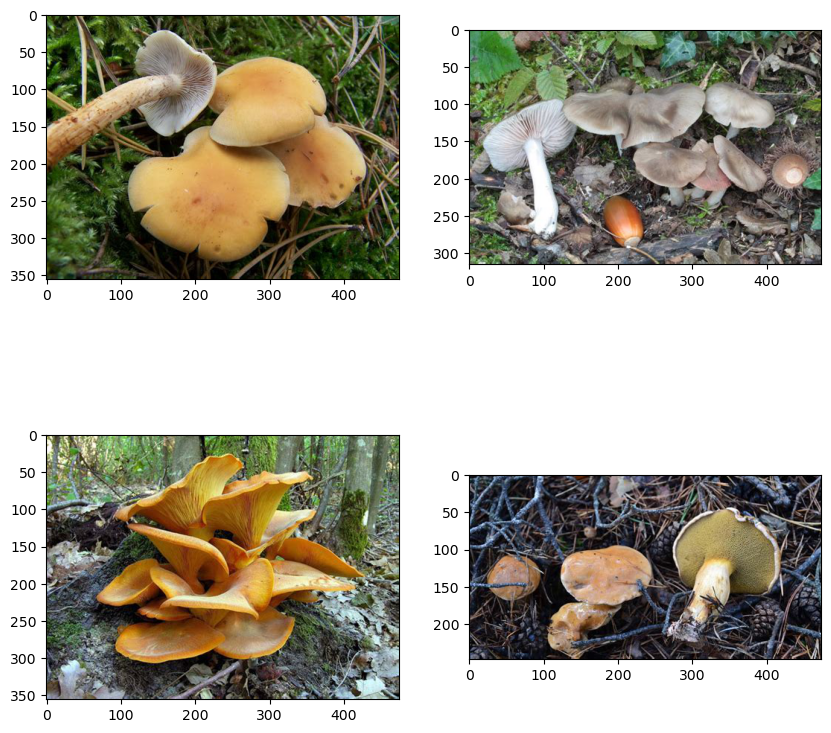

In [ ]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(221+i), plt.imshow(X_train[i])

In [ ]:
X_train = np.array([resize(img, (112,112,3)) for img in X_train])
X_test = np.array([resize(img, (112,112,3)) for img in X_test])
X_valid = np.array([resize(img, (112,112,3)) for img in X_valid])
print(X_train.shape)

X_order_0_train = np.array([resize(img, (112,112,3)) for img in X_order_0_train])
X_order_0_test = np.array([resize(img, (112,112,3)) for img in X_order_0_test])
X_order_0_valid = np.array([resize(img, (112,112,3)) for img in X_order_0_valid])
print(X_order_0_train.shape)

X_order_2_train = np.array([resize(img, (112,112,3)) for img in X_order_2_train])
X_order_2_test = np.array([resize(img, (112,112,3)) for img in X_order_2_test])
X_order_2_valid = np.array([resize(img, (112,112,3)) for img in X_order_2_valid])
print(X_order_2_train.shape)

X_order_3_train = np.array([resize(img, (112,112,3)) for img in X_order_3_train])
X_order_3_test = np.array([resize(img, (112,112,3)) for img in X_order_3_test])
X_order_3_valid = np.array([resize(img, (112,112,3)) for img in X_order_3_valid])
print(X_order_3_train.shape)

X_order_6_train = np.array([resize(img, (112,112,3)) for img in X_order_6_train])
X_order_6_test = np.array([resize(img, (112,112,3)) for img in X_order_6_test])
X_order_6_valid = np.array([resize(img, (112,112,3)) for img in X_order_6_valid])
print(X_order_6_train.shape)

X_order_5_train = np.array([resize(img, (112,112,3)) for img in X_order_5_train])
X_order_5_test = np.array([resize(img, (112,112,3)) for img in X_order_5_test])
X_order_5_valid = np.array([resize(img, (112,112,3)) for img in X_order_5_valid])
print(X_order_5_train.shape)

X_order_8_train = np.array([resize(img, (112,112,3)) for img in X_order_8_train])
X_order_8_test = np.array([resize(img, (112,112,3)) for img in X_order_8_test])
X_order_8_valid = np.array([resize(img, (112,112,3)) for img in X_order_8_valid])
print(X_order_8_train.shape)

X_order_10_train = np.array([resize(img, (112,112,3)) for img in X_order_10_train])
X_order_10_test = np.array([resize(img, (112,112,3)) for img in X_order_10_test])
X_order_10_valid = np.array([resize(img, (112,112,3)) for img in X_order_10_valid])
print(X_order_10_train.shape)

(9761, 112, 112, 3)
(5594, 112, 112, 3)
(989, 112, 112, 3)
(440, 112, 112, 3)
(649, 112, 112, 3)
(210, 112, 112, 3)
(389, 112, 112, 3)
(991, 112, 112, 3)


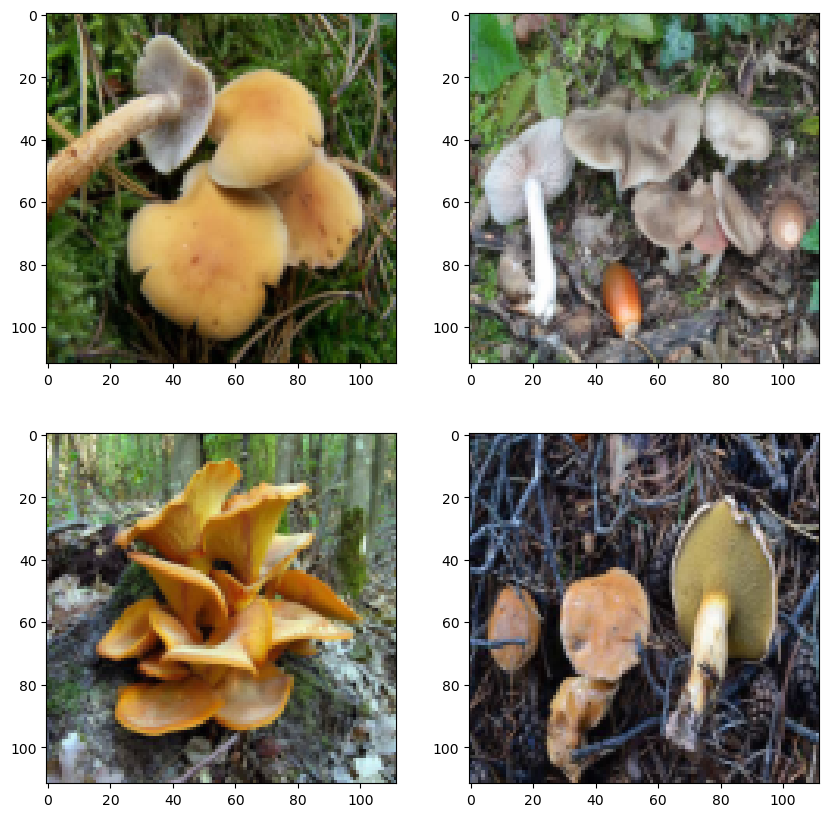

In [ ]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(221+i), plt.imshow(X_train[i])

In [ ]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

y_order_0_train = to_categorical(y_order_0_train)
y_order_0_valid = to_categorical(y_order_0_valid)

y_order_2_train = to_categorical(y_order_2_train)
y_order_2_valid = to_categorical(y_order_2_valid)

y_order_3_train = to_categorical(y_order_3_train)
y_order_3_valid = to_categorical(y_order_3_valid)

y_order_5_train = to_categorical(y_order_5_train)
y_order_5_valid = to_categorical(y_order_5_valid)

y_order_6_train = to_categorical(y_order_6_train)
y_order_6_valid = to_categorical(y_order_6_valid)

y_order_8_train = to_categorical(y_order_8_train)
y_order_8_valid = to_categorical(y_order_8_valid)

y_order_10_train = to_categorical(y_order_10_train)
y_order_10_valid = to_categorical(y_order_10_valid)

print(y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
X_valid = tf.convert_to_tensor(X_valid)
y_valid = tf.convert_to_tensor(y_valid)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_test.shape)

X_order_0_train = tf.convert_to_tensor(X_order_0_train)
y_order_0_train = tf.convert_to_tensor(y_order_0_train)
X_order_0_valid = tf.convert_to_tensor(X_order_0_valid)
y_order_0_valid = tf.convert_to_tensor(y_order_0_valid)

X_order_2_train = tf.convert_to_tensor(X_order_2_train)
y_order_2_train = tf.convert_to_tensor(y_order_2_train)
X_order_2_valid = tf.convert_to_tensor(X_order_2_valid)
y_order_2_valid = tf.convert_to_tensor(y_order_2_valid)

X_order_3_train = tf.convert_to_tensor(X_order_3_train)
y_order_3_train = tf.convert_to_tensor(y_order_3_train)
X_order_3_valid = tf.convert_to_tensor(X_order_3_valid)
y_order_3_valid = tf.convert_to_tensor(y_order_3_valid)

X_order_5_train = tf.convert_to_tensor(X_order_5_train)
y_order_5_train = tf.convert_to_tensor(y_order_5_train)
X_order_5_valid = tf.convert_to_tensor(X_order_5_valid)
y_order_5_valid = tf.convert_to_tensor(y_order_5_valid)

X_order_6_train = tf.convert_to_tensor(X_order_6_train)
y_order_6_train = tf.convert_to_tensor(y_order_6_train)
X_order_6_valid = tf.convert_to_tensor(X_order_6_valid)
y_order_6_valid = tf.convert_to_tensor(y_order_6_valid)

X_order_8_train = tf.convert_to_tensor(X_order_8_train)
y_order_8_train = tf.convert_to_tensor(y_order_8_train)
X_order_8_valid = tf.convert_to_tensor(X_order_8_valid)
y_order_8_valid = tf.convert_to_tensor(y_order_8_valid)

X_order_10_train = tf.convert_to_tensor(X_order_10_train)
y_order_10_train = tf.convert_to_tensor(y_order_10_train)
X_order_10_valid = tf.convert_to_tensor(X_order_10_valid)
y_order_10_valid = tf.convert_to_tensor(y_order_10_valid)

(9761, 112, 112, 3) (9761, 12)
(1272, 112, 112, 3) (1219,)


In [88]:
to_save = {'X_train': X_train, 'X_test': X_test, 'X_valid': X_valid, 'y_train': y_train, 'y_test': y_test, 'y_valid': y_valid}

for item in to_save:
    with open(f'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_project/model_data/{item}.pickle', 'wb') as f:
        pickle.dump(to_save[item], f)

with open('model_data/X_train.pickle', 'rb') as f:  
    train = pickle.load(f)

print(np.array_equal(X_train, train))

True


In [89]:
to_save = {'X_order_0_train': X_order_0_train, 'X_order_0_test': X_order_0_test, 'X_order_0_valid': X_order_0_valid, 'y_order_0_train': y_order_0_train, 'y_order_0_test': y_order_0_test, 'y_order_0_valid': y_order_0_valid}

for item in to_save:
    with open(f'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_project/model_data/{item}.pickle', 'wb') as f:
        pickle.dump(to_save[item], f)

with open('model_data/X_order_0_train.pickle', 'rb') as f:  
    order_0_train = pickle.load(f)

print(np.array_equal(X_order_0_train, order_0_train))

True


In [90]:
to_save = {'X_order_2_train': X_order_2_train, 'X_order_2_test': X_order_2_test, 'X_order_2_valid': X_order_2_valid, 'y_order_2_train': y_order_2_train, 'y_order_2_test': y_order_2_test, 'y_order_2_valid': y_order_2_valid}

for item in to_save:
    with open(f'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_project/model_data/{item}.pickle', 'wb') as f:
        pickle.dump(to_save[item], f)

with open('model_data/X_order_2_train.pickle', 'rb') as f:  
    order_2_train = pickle.load(f)

print(np.array_equal(X_order_2_train, order_2_train))

True


In [91]:
to_save = {'X_order_3_train': X_order_3_train, 'X_order_3_test': X_order_3_test, 'X_order_3_valid': X_order_3_valid, 'y_order_3_train': y_order_3_train, 'y_order_3_test': y_order_3_test, 'y_order_3_valid': y_order_3_valid}

for item in to_save:
    with open(f'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_project/model_data/{item}.pickle', 'wb') as f:
        pickle.dump(to_save[item], f)

with open('model_data/X_order_3_train.pickle', 'rb') as f:  
    order_3_train = pickle.load(f)

print(np.array_equal(X_order_3_train, order_3_train))

True


In [92]:
to_save = {'X_order_5_train': X_order_5_train, 'X_order_5_test': X_order_5_test, 'X_order_5_valid': X_order_5_valid, 'y_order_5_train': y_order_5_train, 'y_order_5_test': y_order_5_test, 'y_order_5_valid': y_order_5_valid}

for item in to_save:
    with open(f'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_project/model_data/{item}.pickle', 'wb') as f:
        pickle.dump(to_save[item], f)

with open('model_data/X_order_5_train.pickle', 'rb') as f:  
    order_5_train = pickle.load(f)

print(np.array_equal(X_order_5_train, order_5_train))

True


In [93]:
to_save = {'X_order_6_train': X_order_6_train, 'X_order_6_test': X_order_6_test, 'X_order_6_valid': X_order_6_valid, 'y_order_6_train': y_order_6_train, 'y_order_6_test': y_order_6_test, 'y_order_6_valid': y_order_6_valid}

for item in to_save:
    with open(f'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_project/model_data/{item}.pickle', 'wb') as f:
        pickle.dump(to_save[item], f)

with open('model_data/X_order_6_train.pickle', 'rb') as f:  
    order_6_train = pickle.load(f)

print(np.array_equal(X_order_6_train, order_6_train))

True


In [94]:
to_save = {'X_order_8_train': X_order_8_train, 'X_order_8_test': X_order_8_test, 'X_order_8_valid': X_order_8_valid, 'y_order_8_train': y_order_8_train, 'y_order_8_test': y_order_8_test, 'y_order_8_valid': y_order_8_valid}

for item in to_save:
    with open(f'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_project/model_data/{item}.pickle', 'wb') as f:
        pickle.dump(to_save[item], f)

with open('model_data/X_order_8_train.pickle', 'rb') as f:  
    order_8_train = pickle.load(f)

print(np.array_equal(X_order_8_train, order_8_train))

True


In [95]:
to_save = {'X_order_10_train': X_order_10_train, 'X_order_10_test': X_order_10_test, 'X_order_10_valid': X_order_10_valid, 'y_order_10_train': y_order_10_train, 'y_order_10_test': y_order_10_test, 'y_order_10_valid': y_order_10_valid}

for item in to_save:
    with open(f'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_project/model_data/{item}.pickle', 'wb') as f:
        pickle.dump(to_save[item], f)

with open('model_data/X_order_10_train.pickle', 'rb') as f:  
    order_10_train = pickle.load(f)

print(np.array_equal(X_order_10_train, order_10_train))

True


In [56]:
order_0_species_dict = {43: 78, 0: 0, 6: 10, 42: 77, 22: 51, 2: 3, 26: 56, 24: 53, 54: 96, 55: 97, 16: 40, 12: 29, 48: 88, 30: 62, 11: 28, 29: 61, 33: 68, 13: 30, 19: 48, 40: 75, 46: 86, 38: 73, 27: 58, 5: 9, 37: 72, 49: 90, 1: 1, 34: 69, 7: 11, 17: 41, 41: 76, 9: 15, 52: 94, 20: 49, 18: 47, 21: 50, 45: 83, 31: 63, 10: 19, 8: 14, 51: 92, 44: 80, 23: 52, 36: 71, 25: 54, 14: 32, 53: 95, 32: 67, 4: 7, 35: 70, 50: 91, 47: 87, 28: 60, 15: 35, 3: 6, 39: 74}
order_2_species_dict = {1: 25, 4: 33, 8: 66, 9: 84, 6: 37, 7: 38, 0: 5, 5: 36, 2: 26, 3: 27}
order_3_species_dict = {2: 13, 1: 12, 3: 18, 0: 8}
order_5_species_dict = {1: 65, 0: 57}
order_6_species_dict = {3: 44, 2: 43, 0: 2, 7: 79, 8: 99, 4: 45, 6: 59, 5: 46, 1: 42}
order_8_species_dict = {0: 16, 3: 98, 2: 34, 1: 24}
order_10_species_dict = {3: 22, 2: 21, 7: 85, 9: 93, 8: 89, 6: 82, 0: 17, 5: 64, 4: 23, 1: 20}

species_conversion_dict = {0: order_0_species_dict,
                            2: order_2_species_dict,
                            3: order_3_species_dict,
                            5: order_5_species_dict,
                            6: order_6_species_dict,
                            8: order_8_species_dict,
                            10: order_10_species_dict}

In [57]:
with open('C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/repository/pickle_jar/species_conversion_dict.pickle', 'wb') as f:
        pickle.dump(species_conversion_dict, f)

In [52]:
first_model_accuragy = 0.3780065627563577

In [55]:
total = 1219
first_order = 0.74

mod_0 = 701/total
mod_1 = 12/total
mod_2 = 124/total
mod_3 = 55/total
mod_4 = 13/total
mod_5 = 26/total
mod_6 = 81/total
mod_7 = 14/total
mod_8 = 48/total
mod_9 = 13/total
mod_10 = 122/total
mod_11 = 10/total

acc_0 = 0.47788873038516405
acc_2 = 0.5080645161290323
acc_3 = 0.8909090909090909
acc_5 = 0.8846153846153846
acc_6 = 0.6049382716049383
acc_8 = 0.7916666666666666
acc_10 = 0.5655737704918032

final = first_order * ((mod_0*acc_0) + (mod_1) + (mod_2*acc_2) + (mod_3*acc_3) + (mod_4) + (mod_5*acc_5) + (mod_6*acc_6) + (mod_7) + (mod_8*acc_8) + (mod_9) + (mod_10*acc_10))
print(final)
print(f'The model has around {round(final*100)}% accuracy.')

0.41158326497128794
The model has around 41% accuracy.


In [ ]:
txt_files_dir = 'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_data/mushroom_metadata/'
txt_files_species = []

for species_file in os.listdir(txt_files_dir):
    species_name = species_file[:-4]
    txt_files_species.append(species_name)

for species in list(species_dict_inverse.values()):
    if species not in txt_files_species:
        print(species)

In [9]:
def get_species_metadata():
    txt_files_dir = 'C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/mushroom_data/mushroom_metadata/'
    species_metadata_dict = {}

    for species_file in os.listdir(txt_files_dir):
        df = pd.read_csv(os.path.join(txt_files_dir, species_file), sep = '\t')
        species_name = species_file[:-4]
        species_metadata_dict[species_name] = df

    return species_metadata_dict

In [10]:
species_metadata_dict = get_species_metadata()

In [12]:
with open("C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/repository/pickle_jar/species_metadata_dict.pickle", 'wb') as f:
    pickle.dump(species_metadata_dict, f)

In [77]:
species_df = species_metadata_dict['Agaricus bisporus']
species_df

,id,paper_id,primers,longitude,latitude,continent,sample_type,ITS1_extracted,ITS2_extracted,ITS_total,Biome,MAT,MAP,pH,year_of_sampling,manipulated,abundances
0,152,Talas_2021_OR,ITS3ngs1 to 5 + ITS3ngs10/ITS4ngs,27.14920,56.7602,Europe,sediment,0,162456,162456,aquatic,6.1,613,NA_,2013,False,1
1,393,Nunez_2019_BS,ITS86F/ITS4,-3.68941,40.4399,Europe,air,0,143091,143091,anthropogenic,14.5,575,NA_,2015,False,5
2,1117,Bissett_AAAA_2016,ITS1F/ITS4,146.89600,-42.2703,Australia,soil,131246,5087,136333,grassland,9.4,801,6.2,2014,False,8
3,1204,Sun_2021_PK,gITS7ngs/ITS4ngsUni,100.17000,27.1200,Asia,topsoil,0,784575,784575,forest,1.2,1179,NA_,2017,False,1
4,1247,Sun_2021_PK,gITS7ngs/ITS4ngsUni,100.17000,27.1200,Asia,topsoil,0,951327,951327,forest,1.2,1179,NA_,2017,False,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,47356,DeBellis_2019_EH,ITS1F/ITS2,-73.94000,45.4300,North America,root,2961,0,2961,forest,7.3,1025,6.01,2015,False,14
164,47929,Nguyen_2016_D8E8,gITS7/ITS4,29.90000,62.6000,Europe,shoot,0,555,555,forest,3.3,608,NA_,2012,False,2
165,48176,Tedersoo_2021_TJ,ITS9MUNngs/ITS4ngsUni,26.29260,58.6227,Europe,soil,951,810,1761,anthropogenic,5.5,647,NA_,2015,False,9
166,49291,Tipton_2019_78B4,ITS1F/ITS2,-155.57600,19.5367,North America,air,1507,0,1507,tundra,4.9,1364,NA_,2001,False,3


In [78]:
for species in list(species_dict_inverse.values()):
    species_df = species_metadata_dict[species]
    if len(species_df[species_df['pH']!='NA_']['pH']) == 0:
        print('No pH data.')
    if len(species_df[species_df['MAT']!='NA_']['pH']) == 0:
        print('No MAT data.')
    if len(species_df[species_df['MAP']!='NA_']['pH']) == 0:
        print('No MAP data.')

No pH data.
No pH data.


In [79]:
continent_group = species_df[species_df['continent']!='NA_'].groupby('continent').count()['id']
continent_data = list(continent_group.values)
continent_labels = list(continent_group.index)
continent_df = pd.DataFrame(continent_data, index=continent_labels, columns=['count'])
continent_df

,count
Antarctica,4
North America,14


In [80]:
continent_df.sort_values('count', ascending=False)

,count
North America,14
Antarctica,4


In [81]:
fig = px.pie(continent_df, values='count', names=continent_df.index, title='Continent')
fig.show()

In [82]:
geo_data = species_df[(species_df['longitude']!='NA_') & (species_df['latitude']!='NA_')]
geo_df = geo_data[['longitude','latitude']]
geo_fig = px.scatter_geo(geo_df, lat='latitude', lon='longitude', title='Mushroom Samples Geographical Location')
geo_fig.show()

In [8]:
species_dict_inverse = {0: 'Agaricus arvensis',
                        1: 'Agaricus bisporus',
                        2: 'Aleuria aurantia',
                        3: 'Amanita caesarea',
                        4: 'Auricularia auricula-judae',
                        5: 'Boletus edulis',
                        6: 'Calocybe gambosa',
                        7: 'Calvatia gigantea',
                        8: 'Cantharellus cibarius',
                        9: 'Coprinus comatus',
                        10: 'Cortinarius caperatus',
                        11: 'Cortinarius variicolor',
                        12: 'Craterellus cornucopioides',
                        13: 'Craterellus tubaeformis',
                        14: 'Fistulina hepatica',
                        15: 'Flammulina velutipes',
                        16: 'Grifola frondosa',
                        17: 'Hericium erinaceus',
                        18: 'Hydnum repandum',
                        19: 'Hygrophorus chrysodon',
                        20: 'Lactarius deliciosus',
                        21: 'Lactarius deterrimus',
                        22: 'Lactarius salmonicolor',
                        23: 'Lactarius subdulcis',
                        24: 'Laetiporus sulphureus',
                        25: 'Leccinum aurantiacum',
                        26: 'Leccinum scabrum',
                        27: 'Leccinum versipelle',
                        28: 'Lentinula edodes',
                        29: 'Macrolepiota procera',
                        30: 'Marasmius oreades',
                        31: 'Phallus indusiatus',
                        32: 'Pleurotus citrinopileatus',
                        33: 'Rhizopogon luteolus',
                        34: 'Sparassis crispa',
                        35: 'Stropharia rugosoannulata',
                        36: 'Suillus bovinus',
                        37: 'Suillus luteus',
                        38: 'Suillus tomentosus',
                        39: 'Tremella fuciformis',
                        40: 'Tricholoma matsutake',
                        41: 'Tricholoma terreum',
                        42: 'Tuber aestivum',
                        43: 'Tuber borchii',
                        44: 'Tuber brumale',
                        45: 'Tuber indicum',
                        46: 'Tuber mesentericum',
                        47: 'Volvariella volvacea',
                        48: 'Cortinarius limonius',
                        49: 'Agaricus moelleri',
                        50: 'Cortinarius malicorius',
                        51: 'Amanita bisporigera',
                        52: 'Cortinarius cinnamomeus',
                        53: 'Armillaria mellea',
                        54: 'Galerina marginata',
                        55: 'Cudonia circinans',
                        56: 'Hypholoma lateritium',
                        57: 'Ramaria formosa',
                        58: 'Omphalotus illudens',
                        59: 'Helvella crispa',
                        60: 'Lepiota cristata',
                        61: 'Inocybe geophylla',
                        62: 'Cortinarius bolaris',
                        63: 'Entoloma rhodopolium',
                        64: 'Lactarius chrysorrheus',
                        65: 'Ramaria pallida',
                        66: 'Paxillus involutus',
                        67: 'Psilocybe semilanceata',
                        68: 'Hypholoma fasciculare',
                        69: 'Clitocybe nebularis',
                        70: 'Coprinopsis atramentaria',
                        71: 'Coprinopsis romagnesiana',
                        72: 'Stropharia aeruginosa',
                        73: 'Lepiota subincarnata',
                        74: 'Clitocybe rivulosa',
                        75: 'Inocybe rimosa',
                        76: 'Omphalotus olearius',
                        77: 'Cortinarius cinnabarinus',
                        78: 'Coprinellus micaceus',
                        79: 'Helvella lacunosa',
                        80: 'Chlorophyllum molybdites',
                        81: 'Calocera viscosa',
                        82: 'Lactarius torminosus',
                        83: 'Inocybe lacera',
                        84: 'Suillus granulatus',
                        85: 'Russula viscida',
                        86: 'Clitocybe dealbata',
                        87: 'Echinoderma asperum',
                        88: 'Agaricus phaeolepidotus',
                        89: 'Russula emetica',
                        90: 'Tricholoma equestre',
                        91: 'Chlorophyllum brunneum',
                        92: 'Cortinarius rubellus',
                        93: 'Lactarius helvus',
                        94: 'Conocybe subovalis',
                        95: 'Cortinarius callisteus',
                        96: 'Inocybe fibrosa',
                        97: 'Amanita farinosa',
                        98: 'Hapalopilus nidulans',
                        99: 'Helvella vespertina'}

In [19]:
import pickle

with open('C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/repository/pickle_jar/species_dict_inverse.pickle', 'wb') as f:
        pickle.dump(species_dict_inverse, f)

with open('../repository/pickle_jar/species_dict_inverse.pickle', 'rb') as f:  
        new_dict = pickle.load(f)

new_dict == species_dict_inverse

True

In [20]:
pH_df = species_df[species_df['pH']!='NA_']['pH']
pH_df = pH_df.astype('float')
# pH_df = pH_df.sortvalues('pH', ascending=False)
pH_df.sort_values(ascending=False)

23    7.90
16    7.35
2     7.20
7     7.10
9     6.80
30    6.36
11    4.83
3     4.57
14    4.50
27    3.80
Name: pH, dtype: float64

In [49]:
species_dict = dict(zip(list(species_dict_inverse.values()), list(species_dict_inverse.keys())))
for i, key in enumerate(species_dict):
    try:
        species_images_links[key]
        species_dict[key] = species_images_links[key]
    except:
        print(key)
        species_dict[key] = input(f'Link for {key}?')
        print(key)
species_dict

Pleurotus citrinopileatus
Pleurotus citrinopileatus
Rhizopogon luteolus
Rhizopogon luteolus
Sparassis crispa
Sparassis crispa
Stropharia rugosoannulata
Stropharia rugosoannulata
Suillus bovinus
Suillus bovinus
Suillus luteus
Suillus luteus
Suillus tomentosus
Suillus tomentosus
Tremella fuciformis
Tremella fuciformis
Tricholoma matsutake
Tricholoma matsutake
Tricholoma terreum
Tricholoma terreum
Tuber aestivum
Tuber aestivum
Tuber borchii
Tuber borchii
Tuber brumale
Tuber brumale
Tuber indicum
Tuber indicum
Tuber mesentericum
Tuber mesentericum
Volvariella volvacea
Volvariella volvacea
Cortinarius limonius
Cortinarius limonius
Agaricus moelleri
Agaricus moelleri
Cortinarius malicorius
Cortinarius malicorius
Amanita bisporigera
Amanita bisporigera
Cortinarius cinnamomeus
Cortinarius cinnamomeus
Armillaria mellea
Armillaria mellea
Galerina marginata
Galerina marginata
Cudonia circinans
Cudonia circinans
Hypholoma lateritium
Hypholoma lateritium
Ramaria formosa
Ramaria formosa
Omphalotus i

{'Agaricus arvensis': 'https://free-images.com/or/46ba/horse_mushroom_agaricus_arvensis.jpg',
 'Agaricus bisporus': 'https://www.mykoweb.com/CAF/photos/large/Agaricus_bisporus_bk-01.jpg',
 'Aleuria aurantia': 'http://3.bp.blogspot.com/-nneeOUCd-qw/VMYPnmFUWrI/AAAAAAAAVLc/Ys3FLa-6OQo/s1600/Aleuria%2Baurantia.jpg',
 'Amanita caesarea': 'https://micologiamessinese.altervista.org/images/Amanita_caesarea.jpg',
 'Auricularia auricula-judae': 'https://img.fotocommunity.com/judasohr-auricularia-auricula-judae-5a0b7b18-5d99-489b-9e59-b45fda8cdaa9.jpg?height=1080',
 'Boletus edulis': 'https://img0.etsystatic.com/124/0/13016081/il_fullxfull.986313566_54x1.jpg',
 'Calocybe gambosa': 'https://identifier-les-champignons.com/wp-content/uploads/2020/06/Calocybe_gambosa_080420wa_cropped-1536x1087.jpg',
 'Calvatia gigantea': 'http://yesofcorsa.com/wp-content/uploads/2017/09/Calvatia-Gigantea-Wallpaper-HQ1.jpg',
 'Cantharellus cibarius': 'https://www.ilgiardinocommestibile.it/wp-content/uploads/2020/09/c

In [50]:
# with open('C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/repository/pickle_jar/species_images_links.pickle', 'wb') as f:
#         pickle.dump(species_dict, f)

In [51]:
with open('C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/repository/pickle_jar/species_images_links.pickle', 'rb') as f:
        species_images_links = pickle.load(f)

In [52]:
len(species_images_links)

100

In [9]:
species_names_lower = [name.lower() for name in list(species_dict_inverse.values())]
species_names_lower[:10]

['agaricus arvensis',
 'agaricus bisporus',
 'aleuria aurantia',
 'amanita caesarea',
 'auricularia auricula-judae',
 'boletus edulis',
 'calocybe gambosa',
 'calvatia gigantea',
 'cantharellus cibarius',
 'coprinus comatus']

In [4]:
base_url = 'https://www.projectnoah.org'
spotting_links = []
range_num = 466
category = 'fungi'

# Create a new Chrome browser instance
chromedriver_path = "C:/Users/Simona/Downloads/chromedriver_win32/chromedriver.exe"
chrome_options = Options()
chrome_options.add_argument("--disable-infobars")
driver = webdriver.Chrome(chromedriver_path, options=chrome_options)

# Load the initial page
driver.get(f'https://www.projectnoah.org/organisms?category={category}&identified=identified&pages={range_num}#page-{range_num}')
time.sleep(range_num)

# Scroll down the page using the Page Down key
body = driver.find_element(by=By.TAG_NAME, value='body')
for i in range(int(1.5*range_num)):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(1)

# Get the HTML content of the scrolled page
html = driver.page_source

# Finding links for each spotting
for page in range(1, range_num+1):
    organisms_page = driver.find_elements(by=By.ID, value=f'page-{page}')
    all_organisms_a = organisms_page[0].find_elements(by=By.TAG_NAME, value='a')
    for a, organism in enumerate(all_organisms_a):
        spotting_links.append(organism.get_attribute('href'))

# Close the browser
driver.quit()

C:\Users\Simona\AppData\Local\Temp\ipykernel_24124\1130779274.py:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chromedriver_path, options=chrome_options)


In [5]:
with open('C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/spotting_links.pickle', 'wb') as f:
        pickle.dump(spotting_links, f)

In [2]:
with open('C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/spotting_links.pickle', 'rb') as f:
        spotting_links = pickle.load(f)

In [ ]:
spotting_list = []

In [45]:
# API key for OpenCage
api_key = '9fc583c010ff40b58606ea4d09cf2c60'

# Getting scientific name for each spotting
for s, spotting in enumerate(spotting_links):
    spotting_dict = {}
    r = requests.get(spotting)
    try:
        if r.status_code == 200:
            soup = bs(r.content)
            scientific_name = soup.find(class_='scientific_name').text
            decoded = scientific_name.replace('\u2060', '')

            if decoded.lower() in species_names_lower:
                img_tag = soup.find('img', {'id': 'spotting_image'})
                src = img_tag['src']
                location = soup.find('h4', {'id': 'spotting_location_name'}).text
                date = soup.find('p', {'class': 'spotting-data'}).contents[0].strip()
                response = requests.get(src)

                if response.status_code == 200:
                    image_data = response.content
                    img_check = Image.open(BytesIO(image_data))

                    if img_check.format != "GIF":
                        img_link = src
                        spotting_dict['species_name'] = decoded.lower().capitalize()
                        spotting_dict['image_link'] = img_link
                        spotting_dict['location'] = location
                        spotting_dict['date'] = date

                        # Getting coordinates using OpenCage
                        url = f'https://api.opencagedata.com/geocode/v1/json?q={location}&key={api_key}'
                        r = requests.get(url)
                        if r.status_code == 200:
                            data = r.json()
                            lat = data['results'][0]['geometry']['lat']
                            lon = data['results'][0]['geometry']['lng']
                            spotting_dict['lat'] = lat
                            spotting_dict['lon'] = lon

                            spotting_list.append(spotting_dict)
                        else:
                            break
    except:
        pass

print(f'{len(spotting_links)} spotting links')

22368 spotting links


In [46]:
spotting_list

[{'species_name': 'Hypholoma lateritium',
  'image_link': 'https://lh3.googleusercontent.com/HANrZkmYLIobAVgnsPmp0lYD95XBmh5HYyd2FZLPxOrV-fPv0O32-FdDa8V0Uujk9yEysfw8g3AtS5w6-0mTIF9qLOGfj6EWL1Y=s580',
  'location': 'Morganton, North Carolina, United States',
  'date': 'Spotted on Dec 12, 2022',
  'lat': 35.7454291,
  'lon': -81.6870837},
 {'species_name': 'Phallus indusiatus',
  'image_link': 'https://lh3.googleusercontent.com/j5joZjCGNxhGz8Lty7P-XCDFYLQzzIiPqpAoK_rZRWouifEPaPXUgIy7RuKvU0nB6OwROkjbsLmxcRBpI1r3tmV7JUFdOxcuLSo=s580',
  'location': 'Babinda, Queensland, Australia',
  'date': 'Spotted on Jan 3, 2023',
  'lat': -17.3443807,
  'lon': 145.9218985},
 {'species_name': 'Clitocybe nebularis',
  'image_link': 'https://lh3.googleusercontent.com/vu9jlwY4cuMik5N1wVKQWLwINK20QgnJGesTdcgW48-4qpzRUiXOwxdc4DdISmonhQ9PLQ-Dq6eEalwc2QnVMKA7JUIRQFfdI58=s580',
  'location': 'Oslo, Norway',
  'date': 'Spotted on Nov 1, 2022',
  'lat': 59.9133301,
  'lon': 10.7389701},
 {'species_name': 'Stropha

In [25]:
with open('C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/repository/pickle_jar/spotting_list.pickle', 'wb') as f:
        pickle.dump(spotting_list, f)

In [40]:
with open('C:/Users/Simona/Desktop/Data Analysis/concordia-bootcamp/capstone_project/repository/pickle_jar/spotting_list.pickle', 'rb') as f:
        spotting_list = pickle.load(f)

In [16]:
len(spotting_links)

22368

In [41]:
len(spotting_list)

1499